## Observations and Insights 

Analysis: Pymaceuticals Inc.





The purpose of this study was to compare the performance of drug of interest, Capomulin, versus the other treatment regimens. Capomulin drug regimen reduced tumor growth in mice during the study of 249 mice over the course of 45 days. Worth mentioning that the above drug regimen's effectiveness rate is followed by Ramicane (of ten drug regimens/including placebo). 

The correlation between mouse weight and the average tumor volume is 0.84 (strong correlation), 
pointing out that it can be a factor in the drug regimen to degree of success.

Standard Error of the mean indicates how accurate the estimate of the true mean of overall population is likely to be and in this case it is 0.329346 for Capomulin and 0.320955 for Ramicane(ralatively small).


Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df =pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer" )

#merged_data_df =pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data_df.head()

#merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
subject_total_count = len(merged_data_df["Mouse ID"].unique())
print(subject_total_count)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df.loc[merged_data_df.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

#checking id number based on output file id
id_number = merged_data_df[merged_data_df["Mouse ID"] == "g989"]                                   
                                 

# Optional: Get all the data for the duplicate mouse ID.
# duplicate= duplicate_mice.loc[:,:]
# duplicate.show()
                     

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_data_df[merged_data_df["Mouse ID"].isin(duplicate_mice)==False]

clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.

clean_df_count= len(clean_df["Mouse ID"].unique())
clean_df_count


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.


mean_value= merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()                                 
median_value= merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_value= merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_value= merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_value= merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
           
summary_st =pd.DataFrame({
    
    "Mean Tumor Volume": mean_value,
    "Median Tumor Volume": median_value,
    "Tumor Volume Variance": var_value,
    "Tumor Volume Std. Dev.": std_value,
    "Tumor Volume Std. Err." : sem_value
})  
    
    
summary_st


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

new_summary = merged_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

new_summary



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

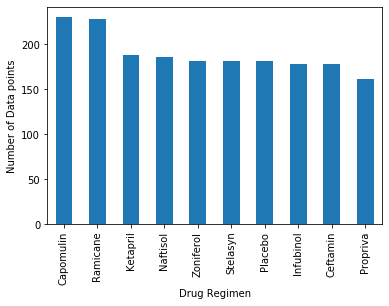

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#using pandas

mice_count= merged_data_df["Drug Regimen"].value_counts()

mice_count.plot(kind="bar")
plt.ylabel("Number of Data points")
plt.xlabel("Drug Regimen")

plt.show()
mice_count



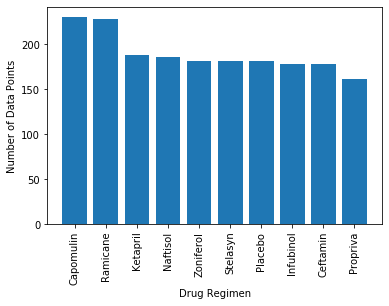

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#pyplot


# dpoints= [0,50,100,150,200]
# x_axis =np.arange(clean_df_count)

plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.bar(mice_count.index.values, mice_count.values,)
plt.xticks(rotation=90)
plt.show()


## Pie Plots

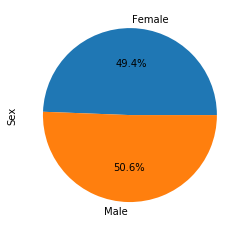

Sex
Female    935
Male      958
Name: Sex, dtype: int64

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_male= merged_data_df.groupby("Sex")["Sex"].count()

female_male.plot(kind="pie",subplots= True,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.xlabel("")

plt.show()
female_male


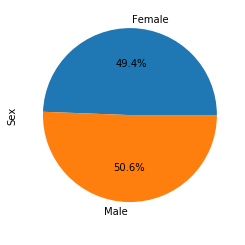

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(female_male,autopct="%1.1f%%",labels=["Female","Male"])
plt.ylabel("Sex")
plt.xlabel(" ")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR (interquartile range) and quantitatively determine if there are any potential outliers. 
#IQR = Q3 − Q1

max_tumor_volume= clean_df.groupby("Mouse ID").max()["Timepoint"]

max_tumor_volume = max_tumor_volume.reset_index()
combined=max_tumor_volume[["Mouse ID", "Timepoint"]].merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")


combined.head()
combined 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
c_df= combined.loc[combined["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
r_df= combined.loc[combined["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
i_df= combined.loc[combined["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
cf_df= combined.loc[combined["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]


In [14]:
c_quartiles = c_df.quantile([.25,.5,.75])
c_lowerq = c_quartiles [0.25]
c_upperq = c_quartiles [0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

c_quartiles = r_df.quantile([.25,.5,.75])
c_lowerq = c_quartiles [0.25]
c_upperq = c_quartiles [0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

c_quartiles = i_df.quantile([.25,.5,.75])
c_lowerq = c_quartiles [0.25]
c_upperq = c_quartiles [0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

c_quartiles = cf_df.quantile([.25,.5,.75])
c_lowerq = c_quartiles [0.25]
c_upperq = c_quartiles [0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)


print(c_lower_bound,c_upper_bound)


25.355449580000002 87.66645829999999


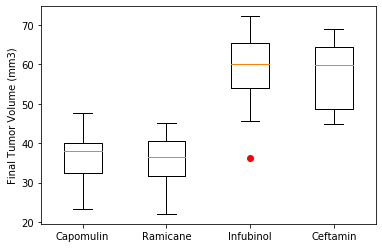

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1,axis =plt.subplots()
axis.set_ylabel("Final Tumor Volume (mm3)")
axis.set_xlabel("")
axis.boxplot([c_df,r_df,i_df,cf_df],0,'r', labels= box_plot)

plt.savefig("Boxplot")
plt.show()


## Line and Scatter Plots

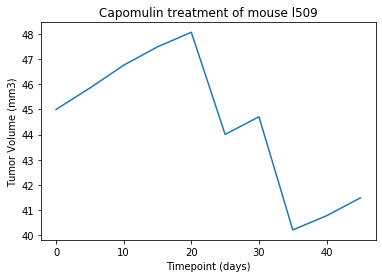

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_plot_df = merged_data_df.loc[merged_data_df["Mouse ID"]== "l509",:]

x_axis = line_plot_df["Timepoint"]
y_axis = line_plot_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)


plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.savefig("lineplot")
plt.show()



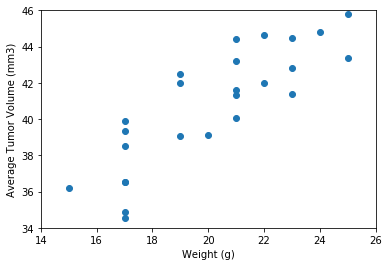

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

c_df = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]
average_tv_gb = c_df .groupby(c_df ["Mouse ID"]).mean()

plt.scatter(average_tv_gb["Weight (g)"],average_tv_gb["Tumor Volume (mm3)"])

# #merged_data_df["colname"] = pd.to_numeric(colname) to numeric if needed


#limits are not set yet properly
plt.xlim(14,26)
plt.ylim(34,46)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("scatterplot")
plt.show()




## Correlation and Regression

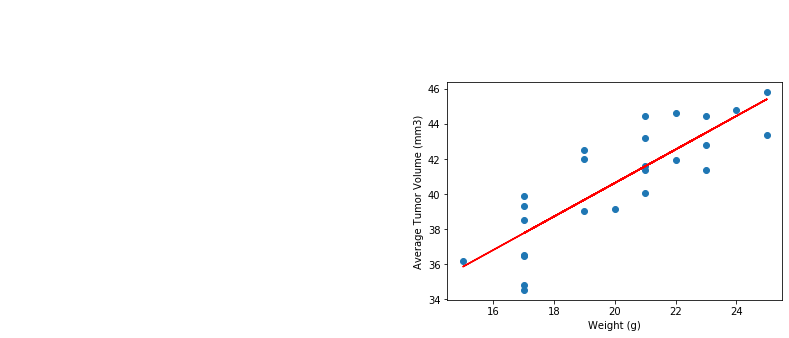

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

c_df = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]
average_tv_gb = c_df.groupby(c_df ["Mouse ID"]).mean()

x_values = average_tv_gb["Weight (g)"]
y_values = average_tv_gb["Tumor Volume (mm3)"]

   
#linear regression model
(slope, intercept, rvalue, pvalue, stdev) = st.linregress(x_values, y_values)

#equaton of line to calc predicted rate
regress_values = x_values * slope + intercept


#plot the linear model on top of scatter plot 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")


#connect the line to the graph
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

#plt.xticks(average_tv_gb["Weight (g)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()

In [19]:
coef_r= round(st.pearsonr(x_values, y_values)[0],2)

print(f"The correlation between mouse weight and the average tumor volume is {coef_r}")


The correlation between mouse weight and the average tumor volume is 0.84
